In [27]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
import datetime
import plotly.express as px

In [28]:
def consulta_bacen(codigo_bacen):
    url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bacen)
    df = pd.read_json(url)
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    df.set_index('data', inplace=True)
    return df
    
    

In [124]:
selic_meta = consulta_bacen(432)
selic_taxa = consulta_bacen(1178)
selic_meta


,valor
data,
1999-03-05,45.00
1999-03-06,45.00
1999-03-07,45.00
1999-03-08,45.00
1999-03-09,45.00
...,...
2022-04-30,11.75
2022-05-01,11.75
2022-05-02,11.75


In [125]:
selic_taxa.isnull().sum()

valor    0
dtype: int64

In [126]:
#procv
#pd.merge(tabela_1, tabela_2, on=['campo_em_comum'], how='left')
proc = pd.merge(selic_taxa, selic_meta, on=['data'], how='left')

In [127]:
proc

,valor_x,valor_y
data,,
1986-06-04,17.80,NaN
1986-06-05,18.50,NaN
1986-06-06,18.31,NaN
1986-06-09,18.76,NaN
1986-06-10,18.40,NaN
...,...,...
2022-03-31,11.65,11.75
2022-04-01,11.65,11.75
2022-04-04,11.65,11.75


In [128]:
proc.isnull().sum()

valor_x       0
valor_y    3184
dtype: int64

In [142]:
proc.dropna(inplace=True)
filtro_proc = proc.loc['2017-04-07':]
filtro_proc.columns = ['selic taxa%', 'selic meta%']
filtro_proc

,selic taxa%,selic meta%
data,,
2017-04-07,12.15,12.25
2017-04-10,12.15,12.25
2017-04-11,12.15,12.25
2017-04-12,12.15,12.25
2017-04-13,11.15,11.25
...,...,...
2022-03-31,11.65,11.75
2022-04-01,11.65,11.75
2022-04-04,11.65,11.75


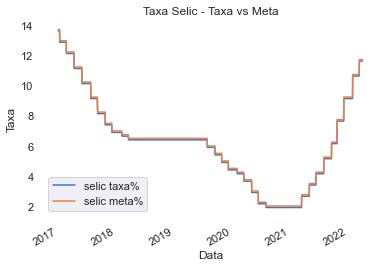

In [141]:
ad=filtro_proc.plot()
plt.title('Taxa Selic - Taxa vs Meta')
plt.xlabel('Data')
plt.ylabel('Taxa')
ad.set_facecolor('white')

In [1]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=a2a47401b6ad72df836b9c522e00b6383f4f742ddecffff30f94389626c51759
  Stored in directory: C:\Users\andre\AppData\Local\Temp\pip-ephem-wheel-cache-l3oe051j\wheels\f2\b5\2c\59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking


In [5]:
import pandas_datareader.data as web

In [7]:
ibov = web.get_data_yahoo('^BVSP')


In [95]:
ibov_retorno = ibov.pct_change()
ibov_retorno


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-07,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-10,-0.004126,0.001546,0.006090,0.000882,0.045880,0.000882
2017-04-11,-0.000862,-0.011916,0.000882,-0.004486,0.065147,-0.004486
2017-04-12,-0.006413,0.007308,-0.004455,-0.007272,0.338252,-0.007272
2017-04-13,-0.007199,-0.015482,-0.007318,-0.016684,-0.244646,-0.016684
...,...,...,...,...,...,...
2022-03-31,0.002896,0.001870,0.002066,-0.002170,0.028348,-0.002170
2022-04-01,0.005783,0.000017,-0.002162,0.013092,0.230207,0.013092
2022-04-04,-0.000074,0.006275,0.013067,-0.002385,-0.360528,-0.002385


In [96]:
data_inicio = '2017-04-07'

In [97]:
ibov_retorno_acumu = (1 + ibov_retorno[ibov_retorno.index >= data_inicio]['Adj Close']).cumprod()
ibov_retorno_acumu.iloc[0] = 1

In [98]:
ibov_retorno_acumu

Date
2017-04-07    1.000000
2017-04-10    1.000882
2017-04-11    0.996393
2017-04-12    0.989147
2017-04-13    0.972644
                ...   
2022-03-31    1.857771
2022-04-01    1.882092
2022-04-04    1.877603
2022-04-05    1.840525
2022-04-06    1.830349
Name: Adj Close, Length: 1235, dtype: float64

<AxesSubplot:xlabel='Date'>

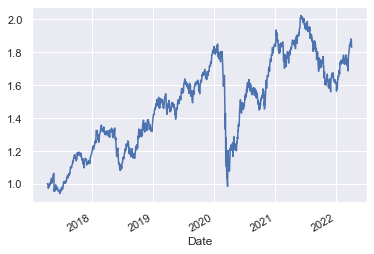

In [99]:
ibov_retorno_acumu.plot()

In [100]:
cdi = consulta_bacen(12)
cdi

,valor
data,
1986-03-06,0.068111
1986-03-10,0.069028
1986-03-12,0.067417
1986-03-14,0.064584
1986-03-17,0.068222
...,...
2022-03-30,0.043739
2022-03-31,0.043739
2022-04-01,0.043739


In [101]:
cdi_acumulado = (1 + cdi[cdi.index >= data_inicio] / 100).cumprod()

In [102]:
cdi_acumulado

,valor
data,
2017-04-07,1.000454
2017-04-10,1.000909
2017-04-11,1.001364
2017-04-12,1.001819
2017-04-13,1.002239
...,...
2022-03-30,1.319434
2022-03-31,1.320011
2022-04-01,1.320589


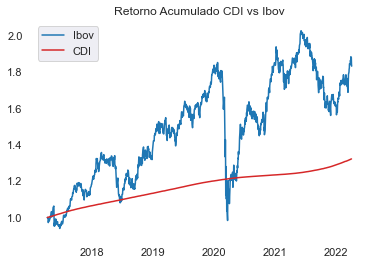

In [122]:
fig, ax=plt.subplots()
ax.plot(ibov_retorno_acumu, color='tab:blue', label='Ibov')
ax.plot(cdi_acumulado, color='tab:red', label='CDI')
plt.title('Retorno Acumulado CDI vs Ibov')
plt.legend()
ax.set_facecolor('white')
plt.show()